In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt_1
import matplotlib.pyplot as plt_2
import matplotlib.pyplot as plt_3
import matplotlib.pyplot as plt_4
import keras
import tensorflow as tf
import sys
import os
import shutil

class mliiitl:
    '''
    Creates mliiitl object from all the user data
    '''
    def __init__(self, x_train, y_train, x_test, y_test, 
                 model, loss, epoch, batch_size):
        try:
            self._x_train = x_train
            self._y_train = y_train
            self._x_test = x_test
            self._y_test = y_test
            self._model = model
            self._loss = loss
            self._epoch = epoch
            self._batch_size = batch_size
        except Exception:
            try:
                print('Invalid arguments given in mliiitl.__init__()')
            except Exception:
                pass
            try:
                print('Invalid arguments given in mliiitl.__init__()', file = sys.stdout)
            except Exception:
                pass 
        

    def delete_model_instance(self):    #open bug: not working
        '''
        Deletes the temp_model
        '''
        print("hello")
        location = os.getcwd()
        folder = 'temp_model'
        path = os.path.join(location, folder)
        print(path)
        print("hello")
        try:
            shutil.rmtree(path)
        except Exception:
            print("Could not delete directory'temp_model',\
             Kindly delete the folder from current working directory.\
             May cause issues otherwise.")
            pass
    
    def save_output_model(arr_models, key):
        '''
        if save argument is True, save all trained models in the current working directory
        '''
        count = 1
        for model in arr_models:
            model.save('model_{model}'.format(model = key[count]))
            count += 1
        print('Models saved in {folder}'.format(folder = os.getcwd()))


    def save_model_instance(model):
        '''
        saves model (temp)
        '''
        model.save('temp_model')
        return 'temp_model'
    
    def splice_dataset_randomly(x_train, y_train, factor):
        '''
        splices 1/8th data randomly for training, or by any user specified factor
        '''
        if factor < 1:
            factor = 1
            print("Factor cannot be less than 1, defaulted to value 1")
        array_new = np.hstack((x_train, np.atleast_2d(y_train).T))
        number_of_rows = array_new.shape[0]
        random_indices = np.random.choice(number_of_rows, size=number_of_rows//factor, replace=False)
        spliced_array_new = array_new[random_indices, :]
        df = pd.DataFrame(spliced_array_new)
        df_y = df.iloc[:, x_train.shape[1]:]
        df_x = df.iloc[:, :x_train.shape[1]]
        spliced_y_train = df_y.to_numpy()
        spliced_x_train = df_x.to_numpy()
        return spliced_x_train,spliced_y_train
    
    def test_performance(self, plots = False, save = False, factor = 8):
        '''
        Compiles and train models on different optimisers
        '''
        temp = mliiitl.save_model_instance(self._model)
        spliced_x_train, spliced_y_train = mliiitl.splice_dataset_randomly(self._x_train, self._y_train, factor)
        model_sgd = tf.keras.models.load_model('temp_model')
        model_rmsprop = tf.keras.models.load_model('temp_model')
        model_adagrad = tf.keras.models.load_model('temp_model')
        model_adadelta = tf.keras.models.load_model('temp_model')
        model_adam = tf.keras.models.load_model('temp_model')
        model_ftrl = tf.keras.models.load_model('temp_model')
        model_nadam = tf.keras.models.load_model('temp_model')
        model_adamax = tf.keras.models.load_model('temp_model')

        validation = (self._x_test, self._y_test)

        model_sgd.compile(optimizer = 'SGD', loss = self._loss, metrics = ['acc'])
        history_sgd = model_sgd.fit(spliced_x_train, spliced_y_train, epochs = self._epoch, batch_size = self._batch_size, validation_data = validation)

        model_rmsprop.compile(optimizer = 'RMSprop', loss = self._loss, metrics = ['acc'])
        history_rmsprop = model_rmsprop.fit(spliced_x_train, spliced_y_train, epochs = self._epoch, batch_size = self._batch_size, validation_data = validation)

        model_adagrad.compile(optimizer = 'Adagrad', loss = self._loss, metrics = ['acc'])
        history_adagrad = model_adagrad.fit(spliced_x_train, spliced_y_train, epochs = self._epoch, batch_size = self._batch_size, validation_data = validation)

        model_adadelta.compile(optimizer = 'Adadelta', loss = self._loss, metrics = ['acc'])
        history_adadelta = model_adagrad.fit(spliced_x_train, spliced_y_train, epochs = self._epoch, batch_size = self._batch_size, validation_data = validation)

        model_adam.compile(optimizer = 'adam', loss = self._loss, metrics = ['acc'])
        history_adam = model_adam.fit(spliced_x_train, spliced_y_train, epochs = self._epoch, batch_size = self._batch_size, validation_data = validation)

        model_ftrl.compile(optimizer = 'Ftrl', loss = self._loss, metrics = ['acc'])
        history_ftrl = model_ftrl.fit(spliced_x_train, spliced_y_train, epochs = self._epoch, batch_size = self._batch_size, validation_data = validation)

        model_nadam.compile(optimizer = 'Nadam', loss = self._loss, metrics = ['acc'])
        history_nadam = model_nadam.fit(spliced_x_train, spliced_y_train, epochs = self._epoch, batch_size = self._batch_size, validation_data = validation)

        model_adamax.compile(optimizer = 'Adamax', loss = self._loss, metrics = ['acc'])
        history_adamax = model_adamax.fit(spliced_x_train, spliced_y_train, epochs = self._epoch, batch_size = self._batch_size, validation_data = validation)
        
        mliiitl.delete_model_instance()
        output = [history_sgd, history_rmsprop, history_adagrad, history_adadelta, history_adam, history_ftrl, history_nadam, history_adamax]

        print("1:'SGD', 2:'RMSprop', 3:'AdaGrad', 4:'AdaDelta', 5:'Adam', 6:'Ftrl', 7:'Nadam', 8:'Adamax'")
        key = {1:'SGD', 2:'RMSprop', 3:'AdaGrad', 4:'AdaDelta', 5:'Adam', 6:'Ftrl', 7:'Nadam', 8:'Adamax'}

        if save:
            arr_models = [model_sgd, model_rmsprop, model_adagrad, model_adadelta, model_adam,
             model_ftrl, model_nadam, model_adamax]
            mliiitl.save_output_model(arr_models, key)

        if plots:
            mliiitl.get_plots(output)
            return output
        else:
            return output

    def get_plots(output):
        '''
        If passed True, outputs 4 plots to visualize the performances of different models with respective optimiser.
        '''
        key = {1:'SGD', 2:'RMSprop', 3:'AdaGrad', 4:'AdaDelta', 5:'Adam', 6:'Ftrl', 7:'Nadam', 8:'Adamax'}
        count = 1
        for history in output:
            plt_1.plot(history.history['acc'], label = key[count])
            count += 1
        plt_1.title('Model Training Accuracy')
        plt_1.ylabel('Training Accuracy')
        plt_1.xlabel('Epoch(s)')
        plt_1.legend()
        plt_1.figure(figsize = (15,10))
        plt_1.show()
        
        count = 1
        for history in output:
            plt_2.plot(history.history['val_acc'], label = key[count])
            count += 1
        plt_2.title('Model Validation Accuracy')
        plt_2.ylabel('Validation Accuracy')
        plt_2.xlabel('Epoch(s)')
        plt_2.legend()
        plt_2.figure(figsize = (15,10))
        plt_2.show()

        count = 1
        for history in output:
            plt_3.plot(history.history['loss'], label = key[count])
            count += 1
        plt_3.title('Model Training Loss')
        plt_3.ylabel('Training Loss')
        plt_3.xlabel('Epoch(s)')
        plt_3.legend()
        plt_3.figure(figsize = (15,10))
        plt_3.show()

        count = 1
        for history in output:
            plt_4.plot(history.history['val_loss'], label = key[count])
            count += 1
        plt_4.title('Model Validation Loss')
        plt_4.ylabel('Validation Loss')
        plt_4.xlabel('Epoch(s)')
        plt_4.legend()
        plt_4.figure(figsize = (15,10))
        plt_4.show()
       


class Hybrid(mliiitl):
    def __init__(self, mliiitl_object, *args):
        self.hybrid_model = mliiitl_object
        if args:
            optimisers = list(args)
        else:
            raise Exception("Pass name of the optimisers")
        self.list_of_optimisers = optimisers
        self.ratio = self.calculate_ratios()
        self.quanta = None
    
    def calculate_ratios(self):
        total = self.hybrid_model._epoch
        parts = len(self.list_of_optimisers)
        ratios = {}
        quanta = total//parts
        self.quanta = quanta
        self.parts = parts
        sum_quanta = 0
        for _ in range(parts-1):
            sum_quanta += quanta
            ratios[_] = [self.list_of_optimisers[_], sum_quanta]
        ratios[parts-1] =  [self.list_of_optimisers[-1], total-sum_quanta]
        print(ratios)
        return ratios

    def run(self):
        flag = 0
        plot_val_loss, plot_loss, plot_acc, plot_val_acc = [], [], [], []
        validation = (self.hybrid_model._x_test, self.hybrid_model._y_test)
        model_hybrid = self.hybrid_model._model
        j = 0
        for i in range(1, self.hybrid_model._epoch + 1):
            print(i, j , flag)
            if i > self.ratio[j][1]:
                if j < len(self.list_of_optimisers)-1:
                    j+=1
                    if j < len(self.list_of_optimisers)-1 and flag == 1:
                        flag = 2
                        print("Running {epoch} epoch(s) on {optimiser}"
                              .format(epoch = self.ratio[j][1] - self.ratio[j-1][1], optimiser = self.list_of_optimisers[j]))
                    elif j == len(self.list_of_optimisers)-1 and flag == 2:
                        flag = 3
                        print("Running {epoch} epoch(s) on {optimiser}"
                              .format(epoch = self.ratio[j][1], optimiser = self.list_of_optimisers[j]))
            if j == 0 and flag == 0:
                flag = 1
                print("Running {epoch} epoch(s) on {optimiser}"
                .format(epoch = self.ratio[j][1], optimiser = self.list_of_optimisers[j]))
            model_hybrid.compile(optimizer = self.list_of_optimisers[j], loss = self.hybrid_model._loss, metrics = ['acc'])
            if i!=1:
                model_hybrid.set_weights(old_weights)
            history = model_hybrid.fit(
                self.hybrid_model._x_train,
                self.hybrid_model._y_train,
                epochs = 1,
                batch_size = self.hybrid_model._batch_size,
                validation_data = validation,
            )
            old_weights = np.array(model_hybrid.get_weights())
            plot_val_loss.append(history.history['val_loss'])
            plot_loss.append(history.history['loss'])
            plot_val_acc.append(history.history['val_acc'])
            plot_acc.append(history.history['acc'])
        
        return {
            "acc": plot_acc,
            "loss": plot_loss,
            "val_acc": plot_val_acc,
            "val_loss": plot_val_loss,
            "model": model_hybrid,
        }

In [236]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.__version__

'2.4.1'

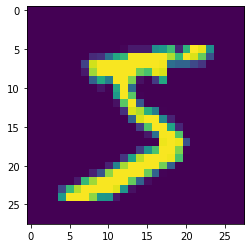

In [237]:
#import datasets

mnist= tf.keras.datasets.mnist #28x28 images
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#print(x_train[0])
plt.imshow(x_train[0])

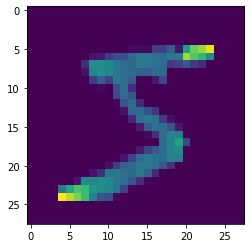

In [238]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0])

In [239]:
#creating DL model
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())#numpy could be used to flatten the 2d array
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))#neurons,activation func(rectified linear)
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))#output layer (neurons=no of classes,softmax layer for probability distribution)

In [240]:
mliiitl_object = mliiitl(x_train, y_train, x_test, y_test, model, "sparse_categorical_crossentropy", 20, 32)


In [241]:
hybrid_object = Hybrid(mliiitl_object, "SGD", "adam", "SGD")

{0: ['SGD', 6], 1: ['adam', 12], 2: ['SGD', 8]}


In [242]:
ans = hybrid_object.run()

1 0 0
Running 6 epoch(s) on SGD
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7528 - acc: 0.4899 - val_loss: 0.4135 - val_acc: 0.8843
2 0 1


c:\users\sharm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:261: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


1875/1875 [==============================] - 4s 2ms/step - loss: 0.3807 - acc: 0.8897 - val_loss: 0.2962 - val_acc: 0.9140
3 0 1
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2950 - acc: 0.9140 - val_loss: 0.2535 - val_acc: 0.9248
4 0 1
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2476 - acc: 0.9274 - val_loss: 0.2251 - val_acc: 0.9348
5 0 1
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2228 - acc: 0.9365 - val_loss: 0.1991 - val_acc: 0.9422
6 0 1
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2009 - acc: 0.9402 - val_loss: 0.1837 - val_acc: 0.9452
7 0 1
Running 6 epoch(s) on adam
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2000 - acc: 0.9401 - val_loss: 0.1009 - val_acc: 0.9668
8 1 2
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0964 - acc: 0.9701 - val_loss: 0.0996 - val_acc: 0.9669
9 1 2
1875/1875 [==============================] - 5s 2ms/step - loss: 0.068

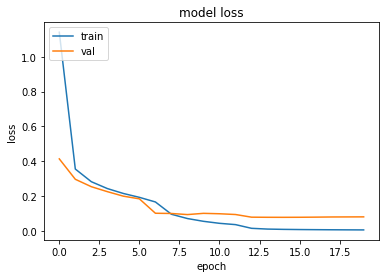

<Figure size 1080x720 with 0 Axes>

In [243]:
plt.plot(ans['loss'])
plt.plot(ans["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure(figsize = (15,10))
plt.show()

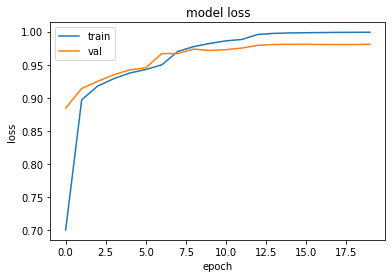

<Figure size 1080x720 with 0 Axes>

In [244]:
plt.plot(ans['acc'])
plt.plot(ans["val_acc"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure(figsize = (15,10))
plt.show()

In [101]:
ans[0]

[[0.10381666570901871,
  0.10486666858196259,
  0.10350000113248825,
  0.10261666774749756,
  0.1025666669011116,
  0.10249999910593033,
  0.10080000013113022,
  0.09939999878406525,
  0.09809999912977219,
  0.09691666811704636],
 [0.09783333539962769,
  0.0999833345413208,
  0.09775000065565109,
  0.10136666893959045,
  0.10100000351667404,
  0.1000666692852974,
  0.10281666368246078,
  0.09886666387319565,
  0.10339999943971634,
  0.10236666351556778]]

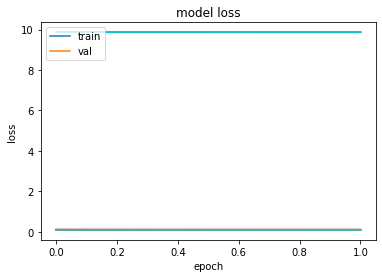

<Figure size 1080x720 with 0 Axes>

In [102]:
import keras
from matplotlib import pyplot as plt

plt.plot(ans[2])
plt.plot(ans[3])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure(figsize = (15,10))
plt.show()

In [103]:
predictions=ans[4].predict(x_test) #input list

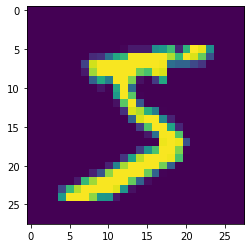

In [113]:
#import datasets

mnist= tf.keras.datasets.mnist #28x28 images
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#print(x_train[0])
plt.imshow(x_train[0])

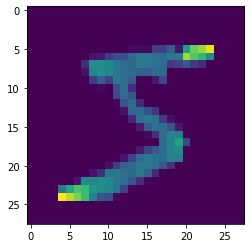

In [114]:
#normalizing the pixel values

x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0])

In [115]:
#creating DL model
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())#numpy could be used to flatten the 2d array
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))#neurons,activation func(rectified linear)
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [116]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [118]:
original_hist=model.fit(x_train,y_train, epochs=20,batch_size=32,validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0351 - accuracy: 0.9883 - val_loss: 0.0982 - val_accuracy: 0.9738
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0274 - accuracy: 0.9911 - val_loss: 0.1095 - val_accuracy: 0.9730
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0253 - accuracy: 0.9914 - val_loss: 0.1084 - val_accuracy: 0.9730
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0210 - accuracy: 0.9930 - val_loss: 0.1130 - val_accuracy: 0.9742
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0189 - accuracy: 0.9937 - val_loss: 0.1159 - val_accuracy: 0.9742
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0165 - accuracy: 0.9942 - val_loss: 0.1034 - val_accuracy: 0.9771
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0157 - accuracy: 0.9947 - val_loss: 0.1350 - val_accuracy:

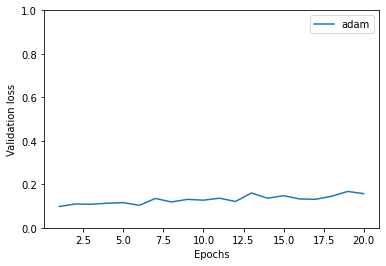

In [119]:

epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']

plt.plot(epochs, original_val_loss, label='adam')
plt.xlabel('Epochs')
plt.ylim(0, 1)
plt.ylabel('Validation loss')
plt.legend()
plt.show()

In [ ]:
model_hybrid.set_weights(a)